## Day 28 Lecture 1 Assignment

In this assignment, we will learn about making predictions with linear models. We will use the king county housing dataset loaded below and analyze the regression from this dataset.

In [1]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
king_county = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/kc_house_data.csv')

In [3]:
king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We'll start by filtering out columns and keeping only: price, bedrooms, bathrooms, sqft_living, floors, and waterfront.

In [12]:
# answer below:
king_county =king_county[['price', "bedrooms", 'bathrooms', 'sqft_living', 'floors', 'waterfront']]

king_county.describe()


,price,bedrooms,bathrooms,sqft_living,floors,waterfront
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,0.007542
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,0.086517
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000


Next create a pair plot in Seaborn to see the relationships between your features.

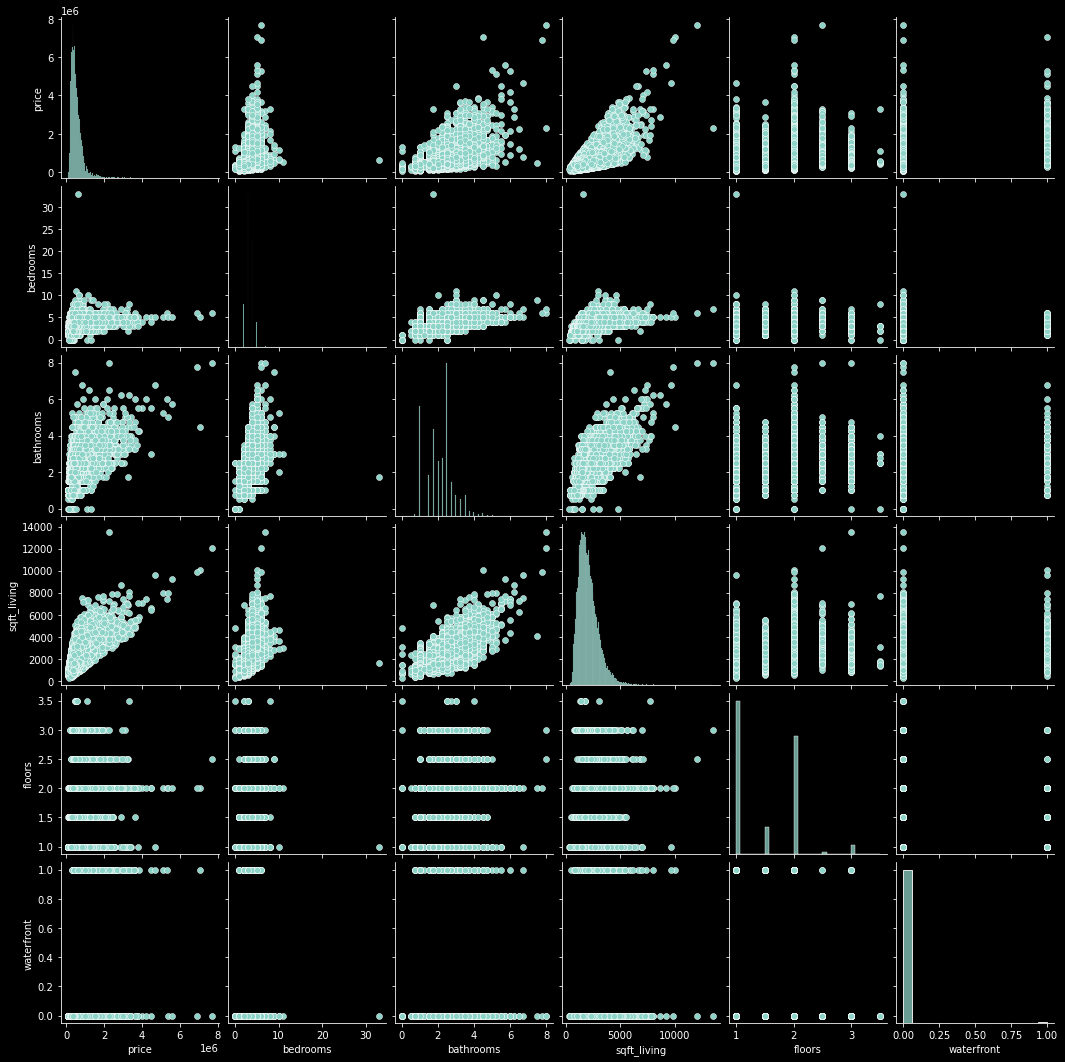

In [14]:
# answer below:
import seaborn as sns
plt.style.use(['dark_background'])

sns.pairplot(data=king_county)



There are two noticeable outliers here that will cause problems. Remove them.

In [23]:
# answer below:
king_county = king_county.iloc[king_county['bedrooms'].values < 20]
king_county = king_county.iloc[king_county['sqft_living'].values < king_county['sqft_living'].max()]

king_county.describe()


,price,bedrooms,bathrooms,sqft_living,floors,waterfront
count,2.161100e+04,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000
mean,5.400030e+05,3.369303,2.114502,2079.390727,1.494262,0.007542
std,3.669527e+05,0.907667,0.769154,915.163507,0.539906,0.086521
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000
25%,3.217250e+05,3.000000,1.750000,1426.000000,1.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000
max,7.700000e+06,11.000000,8.000000,12050.000000,3.500000,1.000000


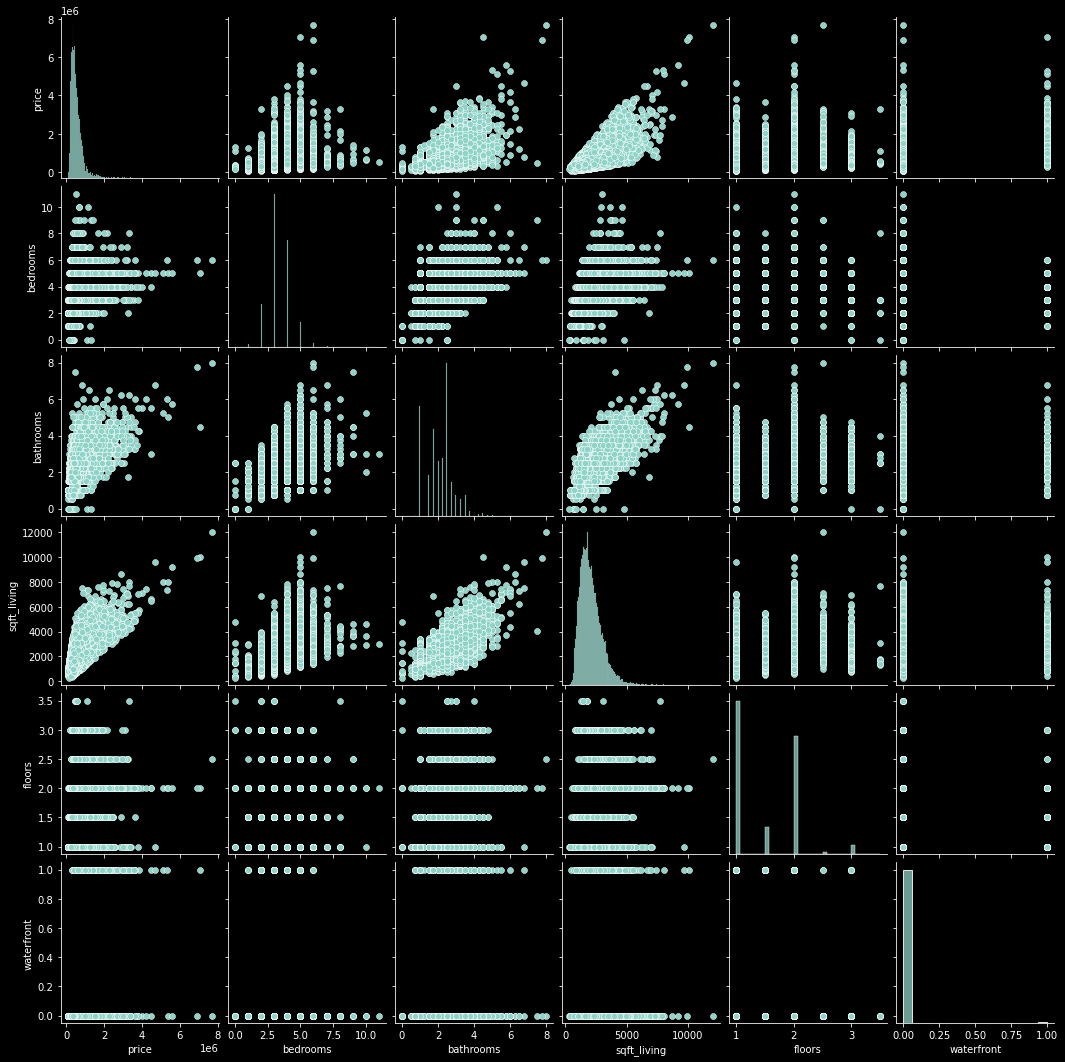

In [44]:
sns.pairplot(king_county)

Next, we'll check for missing values and remove rows containing missing values. We will also make sure that all our data is numeric and convert the columns that are of object type to numeric. Make sure to remove any rows with missing data resulting from the conversion to numeric.

In [24]:
# answer below:
king_county.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21611 non-null  float64
 1   bedrooms     21611 non-null  int64  
 2   bathrooms    21611 non-null  float64
 3   sqft_living  21611 non-null  int64  
 4   floors       21611 non-null  float64
 5   waterfront   21611 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


In [25]:
#A summary of missing variables represented as a percentage of the total missing content. 
def missingness_summary(df, print_log=False, sort='ascending'):
  s = df.isnull().sum()*100/df.isnull().count()
    
  if sort.lower() == 'ascending':
    s = s.sort_values(ascending=True)
  elif sort.lower() == 'descending':
    s = s.sort_values(ascending=False)  
  if print_log: 
    print(s)
  
  return pd.Series(s)

In [26]:
missingness_summary(king_county)

price          0.0
bedrooms       0.0
bathrooms      0.0
sqft_living    0.0
floors         0.0
waterfront     0.0
dtype: float64

Split the data into test and train subsets. Use 20% of the data for the test subset. Use price as the dependent variable.

In [28]:
# answer below:
y = king_county['price']
X = king_county.drop(columns='price')


In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
#Size of the test set.
SIZE = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=SIZE)
print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0], X_test.shape[0]))

There are 17288 training samples and 4323 test samples


Check the model assumptions: homoscedacity, normal errors, and multicollinearity

In [31]:
from sklearn import linear_model

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X_train, y_train)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-5.87368741e+04  1.09726738e+04  3.06444767e+02  1.50243967e+02
  7.70034662e+05]

Intercept: 
 72575.54073513177


In [32]:
predictions = lrm.predict(X_train)
errors = y_train - predictions

print("Mean of the errors in the model is: {}".format(np.mean(errors)))

Mean of the errors in the model is: -4.961186276954779e-11


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


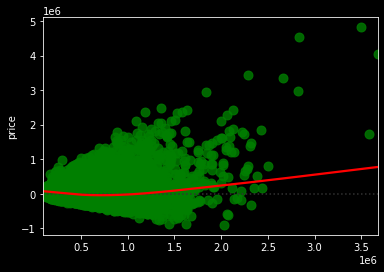

In [33]:
#Look at seaborn residplot documentation for more information about how to plot residuals on a feature basis. This may help in feature optimization.
sns.residplot(x=predictions, y=errors,
              scatter_kws={"s": 80}, color='green', lowess=True, robust=True, 
              line_kws={'color': 'red'});
plt.show()

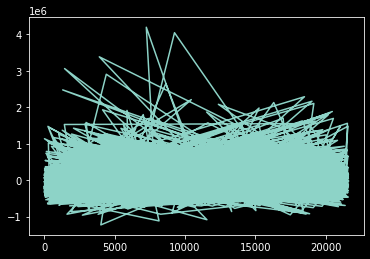

In [37]:
plt.plot(errors)

Bathrooms, bedrooms, and sqft_living seem to have a high collinearity with each other. 

So we do not meet the assumptions for low collinearity for this model.

In [39]:
X_train.corr()

,bedrooms,bathrooms,sqft_living,floors,waterfront
bedrooms,1.000000,0.527578,0.592896,0.180236,-0.004456
bathrooms,0.527578,1.000000,0.755047,0.499046,0.064645
sqft_living,0.592896,0.755047,1.000000,0.352785,0.100231
floors,0.180236,0.499046,0.352785,1.000000,0.024733
waterfront,-0.004456,0.064645,0.100231,0.024733,1.000000


Create your final linear model and produce a model summary. Look at the coefficients and interpret their meaning. How do each of them influence the final prediction?

In [41]:
# answer below
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     4122.
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:06:40   Log-Likelihood:            -2.3953e+05
No. Observations:               17288   AIC:                         4.791e+05
Df Residuals:                   17282   BIC:                         4.791e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.258e+04   8500.847      8.537      

Floors is not a statisically significant coefficient in this model. We can see that an increase in the number of bedrooms by one, price will decrease by $5,874. If we increase the number of bathroms by one, we'll increase the price by 1,097; and if we increae the sqft_living area by 1, there's a 307 dollar incrase in price. 

Predict the y values for the test sample using our model above.

Plot the true vs. predicted values and compute the MAE, MSE, RMSE and MAPE. How accurate is our model?

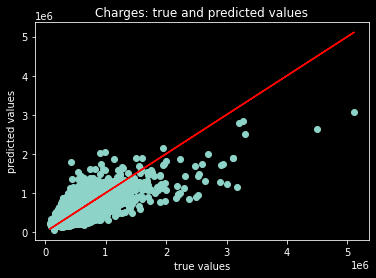

Mean absolute error of the prediction is: 162494.72357845728
Mean squared error of the prediction is: 54397499050.84957
Root mean squared error of the prediction is: 233232.7143666805
Mean absolute percentage error of the prediction is: 34.416467390074665


In [43]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

All of these values are incredibly large. We have failed to accurately predict house prices. 

I suspect that this may be caused by not meeting the assumptions as provided by Markov-Gauss. Either another set of features is needed or we should consider adding some interactions to produce an accurate model. 